In [4]:
%pip install pandas numpy matplotlib seaborn scikit-learn pyreadstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 528.0/528.0 kB 4.0 MB/s  0:00:0036m-:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pyreadstat]
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import pyreadstat
import os
from pathlib import Path
import warnings
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

print("Librerías importadas exitosamente")

Matplotlib is building the font cache; this may take a moment.


Librerías importadas exitosamente


# Análisis Exploratorio de Datos - CineVision Studios

Este notebook contiene el análisis exploratorio de datos de películas para CineVision Studios.

## Carga de datos

In [7]:
# Cargar el dataset
df = pd.read_csv('movies_2026.csv', encoding='latin-1')
print(f"Dataset cargado: {df.shape[0]} películas, {df.shape[1]} variables")

Dataset cargado: 19883 películas, 28 variables


## Exploración Rápida de Datos

Se realiza una exploración inicial del dataset para comprender su estructura, dimensiones y características generales.

In [8]:
# Información general del dataset
print("=== INFORMACIÓN GENERAL ===")
df.info()
print("\n" + "="*50)
print("\n=== PRIMERAS FILAS ===")
display(df.head())
print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
display(df.describe())
print("\n=== VALORES NULOS POR VARIABLE ===")
valores_nulos = df.isnull().sum()
display(pd.DataFrame({
    'Variable': valores_nulos.index,
    'Valores Nulos': valores_nulos.values,
    'Porcentaje (%)': (valores_nulos.values / len(df) * 100).round(2)
}).query('`Valores Nulos` > 0'))

=== INFORMACIÓN GENERAL ===
<class 'pandas.DataFrame'>
RangeIndex: 19883 entries, 0 to 19882
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         19883 non-null  int64  
 1   budget                     19883 non-null  float64
 2   genres                     17918 non-null  str    
 3   homePage                   5607 non-null   str    
 4   productionCompany          14223 non-null  str    
 5   productionCompanyCountry   11473 non-null  str    
 6   productionCountry          16009 non-null  str    
 7   revenue                    19883 non-null  float64
 8   runtime                    19883 non-null  int64  
 9   video                      19397 non-null  object 
 10  director                   18907 non-null  str    
 11  actors                     17282 non-null  str    
 12  actorsPopularity           17275 non-null  str    
 13  actorsCharacter            17

,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount,releaseYear
0,1627085,0.0,Drama|Crime,NaN,NaN,NaN,NaN,0.0,95,False,...,2026-02-01,0.0,0,2,0,0,8,2.0,5.0,2026.0
1,1626914,0.0,Animation,NaN,NaN,NaN,NaN,0.0,3,False,...,2026-02-01,0.0,0,1,0,0,4,0.0,0.0,2026.0
2,1626898,0.0,Animation,NaN,NaN,NaN,NaN,0.0,2,False,...,2026-02-01,0.0,0,1,0,0,3,0.0,0.0,2026.0
3,1626808,0.0,Thriller|Mystery|Documentary,NaN,NaN,NaN,NaN,0.0,5,False,...,2026-02-01,0.0,0,3,0,0,7,0.0,0.0,2026.0
4,1626678,0.0,Animation,NaN,NaN,NaN,NaN,0.0,12,False,...,2026-02-01,0.0,0,1,0,0,3,0.0,0.0,2026.0



=== ESTADÍSTICAS DESCRIPTIVAS ===


,id,budget,revenue,runtime,popularity,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount,releaseYear
count,1.988300e+04,1.988300e+04,1.988300e+04,19883.000000,19883.000000,19883.000000,19883.000000,19883.000000,19883.000000,19883.000000,19883.000000,19846.000000,19721.000000,19881.000000
mean,9.022402e+05,9.413280e+06,2.879213e+07,66.093799,26.248842,3.837069,675.927325,1.949253,1.972539,1.230247,1082.049640,3516.505996,8224.352061,2016.827222
std,6.848978e+05,2.774781e+07,1.109805e+08,50.089055,156.067177,3.397705,1938.194656,1.256225,2.312075,2.244688,26402.818732,47768.661984,71257.943156,12.838005
min,5.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1902.000000
25%,1.462195e+05,0.000000e+00,0.000000e+00,10.000000,0.054600,0.000000,0.000000,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,2013.000000
50%,8.696230e+05,0.000000e+00,0.000000e+00,86.000000,8.502000,5.400000,6.000000,2.000000,1.000000,1.000000,9.000000,2.000000,3.000000,2021.000000
75%,1.589602e+06,1.000000e+06,3.306335e+05,103.000000,22.239000,6.800000,423.000000,3.000000,3.000000,1.000000,21.000000,6.000000,12.000000,2025.000000
max,1.627166e+06,3.800000e+08,2.847246e+09,750.000000,11474.647000,10.000000,30788.000000,16.000000,89.000000,155.000000,919590.000000,922162.000000,922017.000000,2026.000000



=== VALORES NULOS POR VARIABLE ===


,Variable,Valores Nulos,Porcentaje (%)
2,genres,1965,9.88
3,homePage,14276,71.80
4,productionCompany,5660,28.47
5,productionCompanyCountry,8410,42.30
6,productionCountry,3874,19.48
9,video,486,2.44
10,director,976,4.91
11,actors,2601,13.08
12,actorsPopularity,2608,13.12
13,actorsCharacter,2835,14.26


**Análisis:** El dataset contiene información de 19,883 películas con 28 variables que describen aspectos financieros, de producción, elenco y recepción del público. Se observan valores nulos en algunas variables que deberán considerarse en análisis posteriores.

## Clasificación de Variables por Tipo

Se clasifican todas las variables del dataset según su naturaleza estadística.

In [9]:
# Clasificación de variables
clasificacion_variables = {
    'Cuantitativa Continua': [
        'popularity', 'actorsPopularity', 'voteAvg'
    ],
    'Cuantitativa Discreta': [
        'id', 'budget', 'revenue', 'runtime', 'voteCount', 
        'genresAmount', 'productionCoAmount', 'productionCountriesAmount',
        'actorsAmount', 'castWomenAmount', 'castMenAmount', 'releaseYear'
    ],
    'Cualitativa Nominal': [
        'genres', 'homePage', 'productionCompany', 'productionCompanyCountry',
        'productionCountry', 'originalTitle', 'title', 'originalLanguage',
        'director', 'actors', 'actorsCharacter'
    ],
    'Cualitativa Ordinal': [
        'video', 'releaseDate'
    ]
}

# Crear tabla de clasificación
clasificacion_df = []
for tipo, variables in clasificacion_variables.items():
    for var in variables:
        clasificacion_df.append({'Variable': var, 'Tipo': tipo})

clasificacion_df = pd.DataFrame(clasificacion_df)
display(clasificacion_df)

,Variable,Tipo
0,popularity,Cuantitativa Continua
1,actorsPopularity,Cuantitativa Continua
2,voteAvg,Cuantitativa Continua
3,id,Cuantitativa Discreta
4,budget,Cuantitativa Discreta
5,revenue,Cuantitativa Discreta
6,runtime,Cuantitativa Discreta
7,voteCount,Cuantitativa Discreta
8,genresAmount,Cuantitativa Discreta
9,productionCoAmount,Cuantitativa Discreta


**Análisis:** Las variables se clasifican en cuatro categorías. Las continuas representan índices y promedios; las discretas incluyen conteos y valores monetarios; las nominales describen características sin orden; y las ordinales (video como booleano y releaseDate como temporal) tienen un orden implícito.

## Análisis de Distribución Normal y Tablas de Frecuencia

### Pruebas de Normalidad para Variables Cuantitativas

Se aplica la prueba de Shapiro-Wilk para determinar si las variables cuantitativas siguen una distribución normal. Dado el tamaño del dataset, se utiliza una muestra aleatoria de 5000 observaciones para la prueba.

In [11]:
# Variables cuantitativas para prueba de normalidad (solo numéricas)
vars_cuantitativas = ['popularity', 'budget', 'revenue', 'runtime', 'voteCount', 
                      'voteAvg', 'genresAmount', 'productionCoAmount',
                      'productionCountriesAmount', 'actorsAmount', 'castWomenAmount', 'castMenAmount']

# Prueba de normalidad con muestra aleatoria
resultados_normalidad = []
np.random.seed(42)

for var in vars_cuantitativas:
    # Filtrar valores no nulos y convertir a numérico
    data = pd.to_numeric(df[var], errors='coerce').dropna()
    if len(data) > 5000:
        muestra = data.sample(5000, random_state=42)
    else:
        muestra = data
    
    # Prueba de Shapiro-Wilk
    if len(muestra) >= 3:
        stat, p_valor = stats.shapiro(muestra)
        es_normal = "Sí" if p_valor > 0.05 else "No"
        resultados_normalidad.append({
            'Variable': var,
            'Estadístico': round(stat, 4),
            'p-valor': f"{p_valor:.4e}",
            'Normal (α=0.05)': es_normal
        })

normalidad_df = pd.DataFrame(resultados_normalidad)
display(normalidad_df)

,Variable,Estadístico,p-valor,Normal (α=0.05)
0,popularity,0.0796,6.7461e-94,No
1,budget,0.3815,8.1661e-85,No
2,revenue,0.2646,1.0351e-88,No
3,runtime,0.8699,9.8167e-54,No
4,voteCount,0.3791,6.6645e-85,No
5,voteAvg,0.7941,3.8745e-62,No
6,genresAmount,0.9183,7.0227e-46,No
7,productionCoAmount,0.7754,8.5072e-64,No
8,productionCountriesAmount,0.1697,1.6938e-91,No
9,actorsAmount,0.0123,1.4652e-95,No


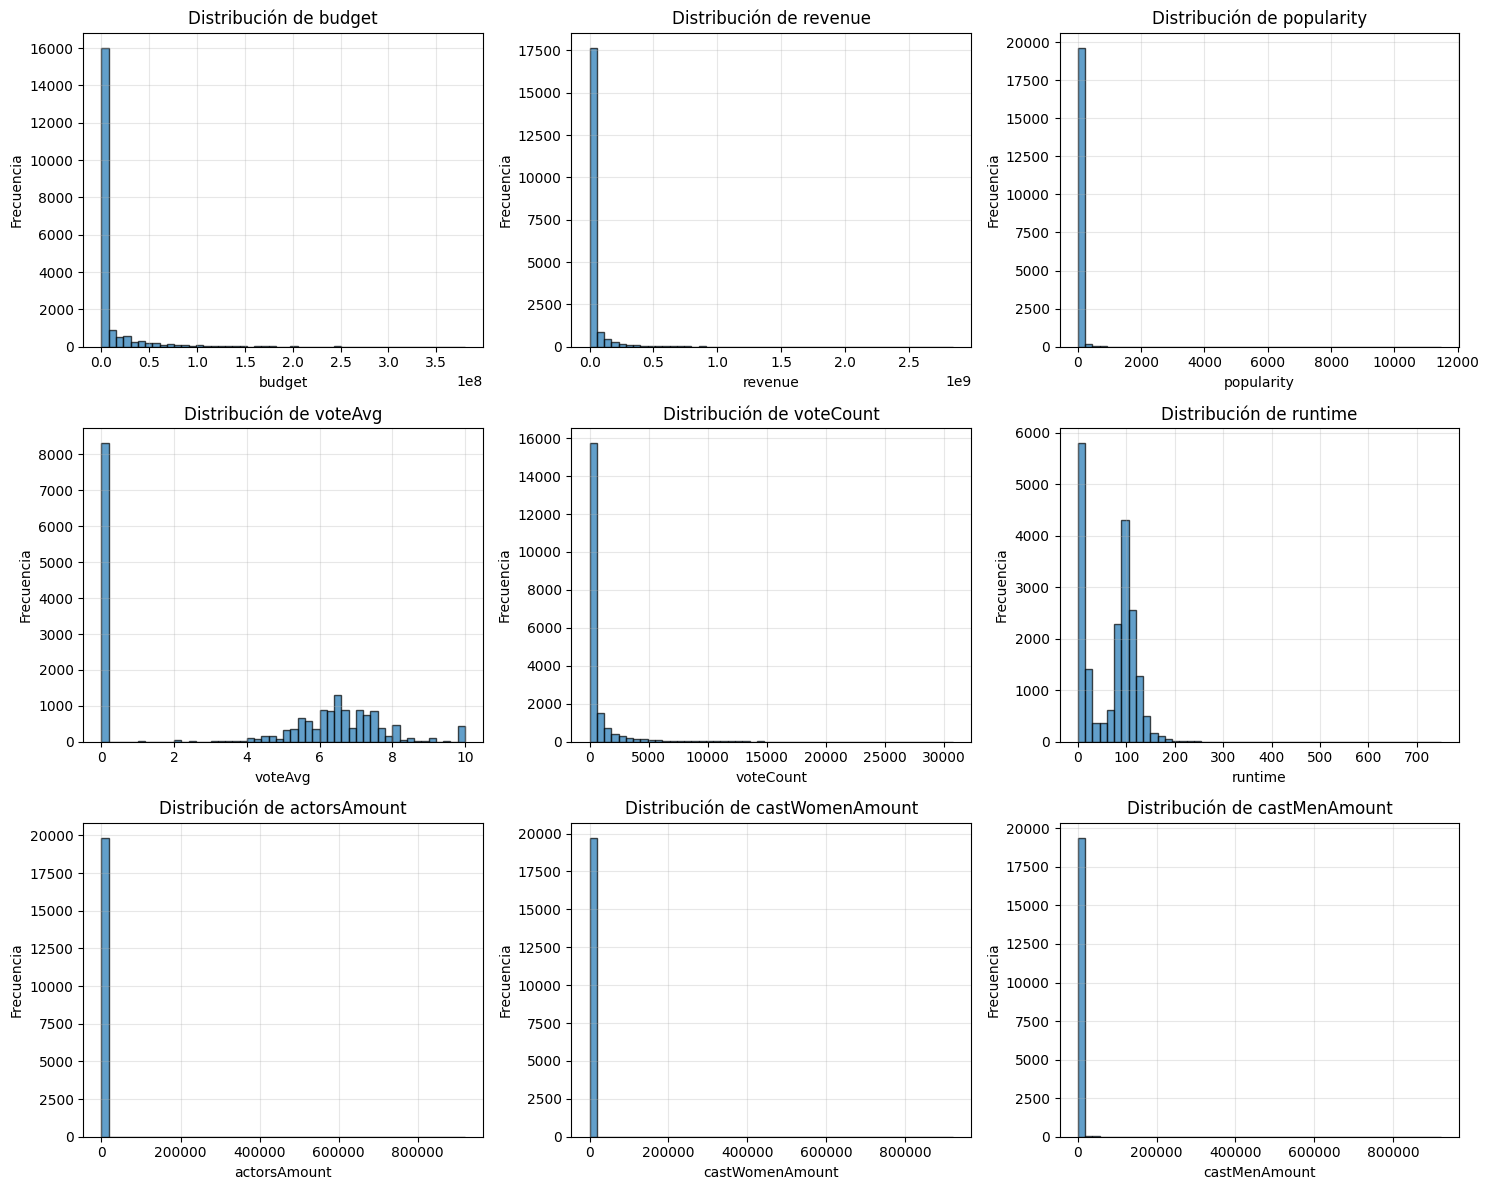

In [12]:
# Histogramas de las principales variables cuantitativas
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

vars_principales = ['budget', 'revenue', 'popularity', 'voteAvg', 'voteCount', 
                    'runtime', 'actorsAmount', 'castWomenAmount', 'castMenAmount']

for idx, var in enumerate(vars_principales):
    data = df[var].dropna()
    axes[idx].hist(data, bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribución de {var}')
    axes[idx].set_xlabel(var)
    axes[idx].set_ylabel('Frecuencia')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Análisis:** Los resultados de la prueba de Shapiro-Wilk indican que ninguna de las variables cuantitativas sigue una distribución normal (p-valor < 0.05). Esto se debe principalmente a la presencia de valores extremos, asimetría positiva y concentración de datos en ciertos rangos. Las variables financieras (budget, revenue) y de popularidad muestran distribuciones altamente sesgadas hacia valores bajos con algunos valores extremadamente altos.

### Tablas de Frecuencia para Variables Cualitativas

Se analizan las principales variables cualitativas del dataset.

=== IDIOMA ORIGINAL (TOP 15) ===


,Idioma,Frecuencia,Porcentaje (%)
0,en,11961,60.16
1,es,1238,6.23
2,fr,1094,5.50
3,ja,868,4.37
4,pt,628,3.16
5,de,461,2.32
6,zh,365,1.84
7,ko,336,1.69
8,it,302,1.52
9,nl,192,0.97


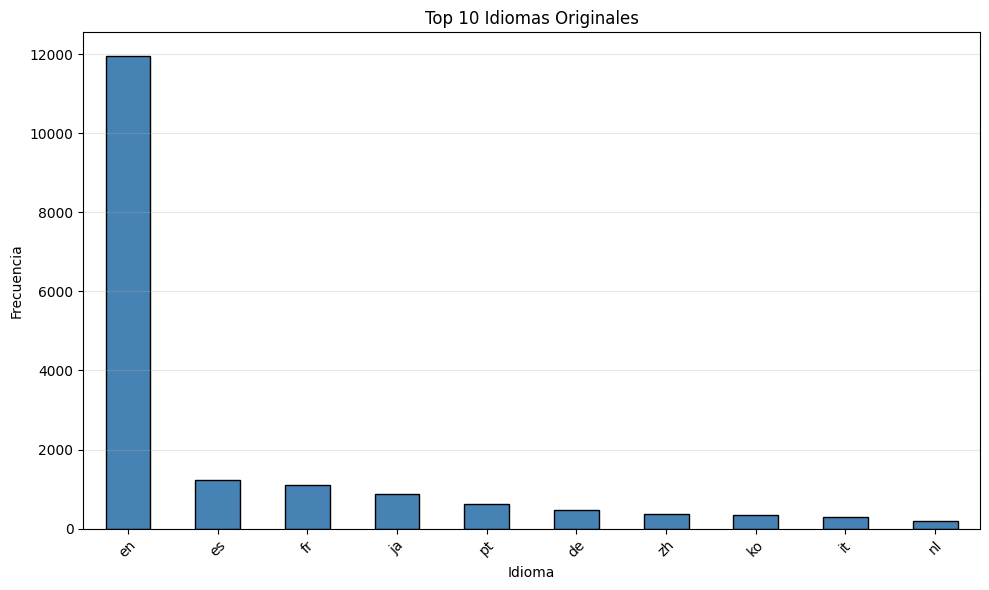

In [13]:
# Tabla de frecuencias: Idioma Original
print("=== IDIOMA ORIGINAL (TOP 15) ===")
freq_idioma = df['originalLanguage'].value_counts().head(15)
freq_idioma_df = pd.DataFrame({
    'Idioma': freq_idioma.index,
    'Frecuencia': freq_idioma.values,
    'Porcentaje (%)': (freq_idioma.values / len(df) * 100).round(2)
})
display(freq_idioma_df)

# Gráfico
plt.figure(figsize=(10, 6))
freq_idioma.head(10).plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Top 10 Idiomas Originales')
plt.xlabel('Idioma')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

=== VIDEO PROMOCIONAL ===


,Tiene Video,Frecuencia,Porcentaje (%)
0,False,19313,97.13
1,True,84,0.42


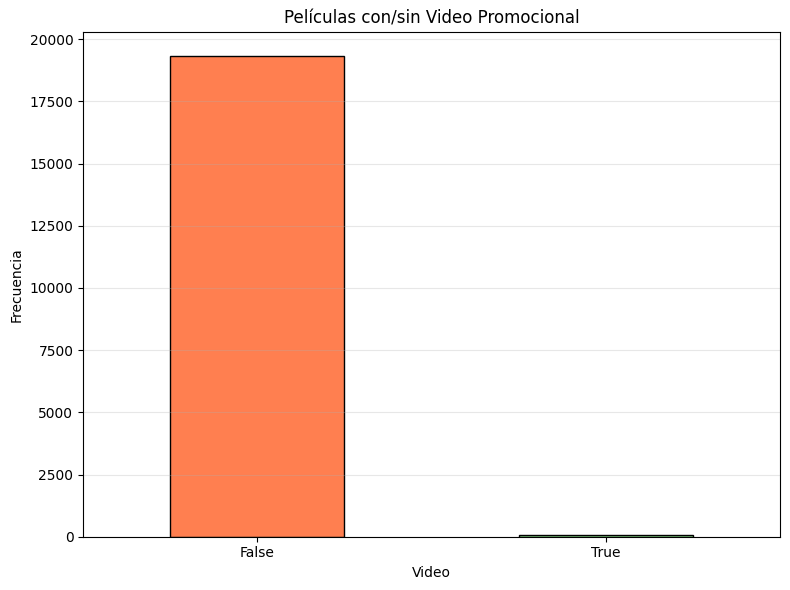

In [14]:
# Tabla de frecuencias: Video Promocional
print("=== VIDEO PROMOCIONAL ===")
freq_video = df['video'].value_counts()
freq_video_df = pd.DataFrame({
    'Tiene Video': freq_video.index,
    'Frecuencia': freq_video.values,
    'Porcentaje (%)': (freq_video.values / len(df) * 100).round(2)
})
display(freq_video_df)

# Gráfico
plt.figure(figsize=(8, 6))
freq_video.plot(kind='bar', color=['coral', 'lightgreen'], edgecolor='black')
plt.title('Películas con/sin Video Promocional')
plt.xlabel('Video')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

=== GÉNERO PRINCIPAL (TOP 15) ===


,Género,Frecuencia,Porcentaje (%)
0,Drama,3734,18.78
1,Comedy,2640,13.28
2,Documentary,2245,11.29
3,Action,1760,8.85
4,Horror,1513,7.61
5,Animation,1247,6.27
6,Thriller,854,4.30
7,Adventure,629,3.16
8,Romance,585,2.94
9,Crime,497,2.50


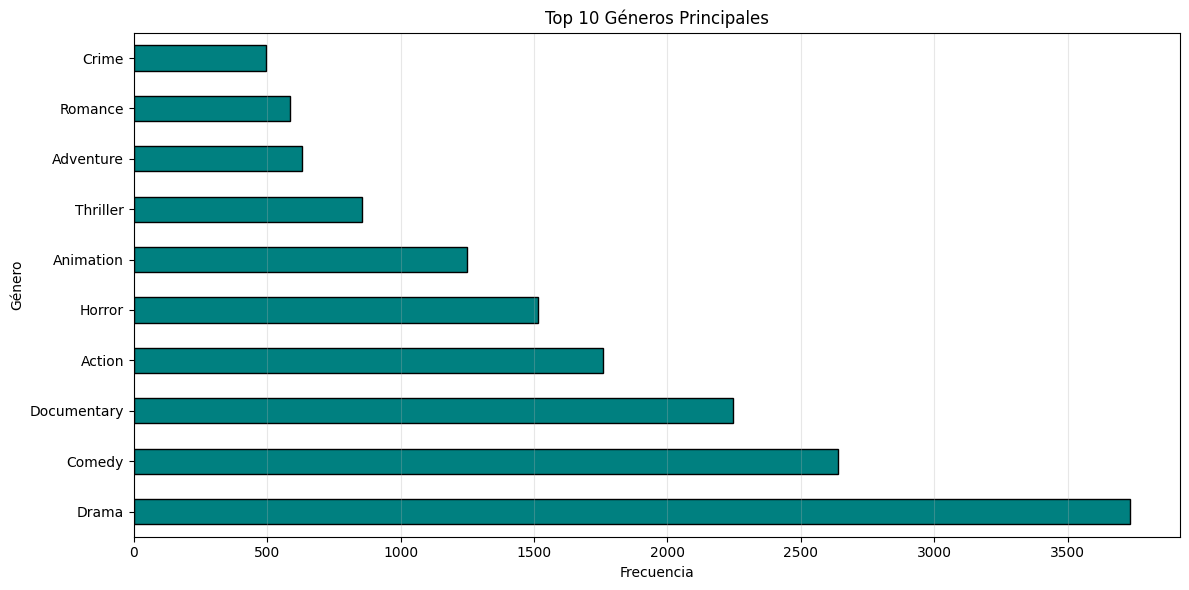

In [15]:
# Tabla de frecuencias: Género (se toma el primer género de la lista)
print("=== GÉNERO PRINCIPAL (TOP 15) ===")
df['genero_principal'] = df['genres'].str.split('|').str[0]
freq_genero = df['genero_principal'].value_counts().head(15)
freq_genero_df = pd.DataFrame({
    'Género': freq_genero.index,
    'Frecuencia': freq_genero.values,
    'Porcentaje (%)': (freq_genero.values / len(df) * 100).round(2)
})
display(freq_genero_df)

# Gráfico
plt.figure(figsize=(12, 6))
freq_genero.head(10).plot(kind='barh', color='teal', edgecolor='black')
plt.title('Top 10 Géneros Principales')
plt.xlabel('Frecuencia')
plt.ylabel('Género')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

**Análisis:** Las tablas de frecuencia revelan que el inglés domina ampliamente como idioma original, seguido por francés e italiano. La mayoría de películas no cuentan con videos promocionales. Los géneros Drama, Comedia y Thriller son los más frecuentes en el dataset, lo que refleja las preferencias tradicionales de la industria cinematográfica.

## Preguntas Clave para CineVision Studios

### 4.1 Top 10 Películas con Mayor Presupuesto

In [16]:
# Top 10 películas con mayor presupuesto
top_presupuesto = df.nlargest(10, 'budget')[['title', 'budget', 'releaseYear', 'director', 'genres']]
top_presupuesto['budget_millones'] = (top_presupuesto['budget'] / 1_000_000).round(2)

print("=== TOP 10 PELÍCULAS CON MAYOR PRESUPUESTO ===")
display(top_presupuesto[['title', 'budget_millones', 'releaseYear', 'director', 'genres']])

=== TOP 10 PELÍCULAS CON MAYOR PRESUPUESTO ===


,title,budget_millones,releaseYear,director,genres
10606,Pirates of the Caribbean: On Stranger Tides,380.0,2011.0,Rob Marshall,Adventure|Action|Fantasy
14600,Avengers: Age of Ultron,365.0,2015.0,Joss Whedon,Action|Adventure|Science Fiction
15842,Avengers: Endgame,356.0,2019.0,Anthony Russo|Joe Russo,Adventure|Science Fiction|Action
5907,Avatar: Fire and Ash,350.0,2025.0,James Cameron,Science Fiction|Adventure|Fantasy
10053,Pirates of the Caribbean: At World's End,300.0,2007.0,Gore Verbinski,Adventure|Fantasy|Action
14843,Justice League,300.0,2017.0,Zack Snyder,Action|Adventure|Fantasy|Science Fiction
15843,Avengers: Infinity War,300.0,2018.0,Anthony Russo|Joe Russo,Adventure|Action|Science Fiction
10497,Superman Returns,270.0,2006.0,Bryan Singer,Science Fiction|Action|Adventure
13681,Tangled,260.0,2010.0,Byron Howard|Nathan Greno,Animation|Family
17024,The Lion King,260.0,2019.0,Jon Favreau,Adventure|Family|Animation


**Análisis:** Las películas con mayores presupuestos son producciones de gran escala, principalmente de géneros Action, Adventure y Science Fiction. Estos proyectos requieren inversiones significativas en efectos especiales, tecnología y elencos de alto perfil, lo que justifica sus presupuestos millonarios.

### 4.2 Top 10 Películas con Mayores Ingresos

In [17]:
# Top 10 películas con mayores ingresos
top_ingresos = df.nlargest(10, 'revenue')[['title', 'revenue', 'budget', 'releaseYear', 'director', 'genres']]
top_ingresos['revenue_millones'] = (top_ingresos['revenue'] / 1_000_000).round(2)
top_ingresos['budget_millones'] = (top_ingresos['budget'] / 1_000_000).round(2)
top_ingresos['roi'] = ((top_ingresos['revenue'] - top_ingresos['budget']) / top_ingresos['budget'] * 100).round(2)

print("=== TOP 10 PELÍCULAS CON MAYORES INGRESOS ===")
display(top_ingresos[['title', 'revenue_millones', 'budget_millones', 'roi', 'releaseYear', 'director']])

=== TOP 10 PELÍCULAS CON MAYORES INGRESOS ===


,title,revenue_millones,budget_millones,roi,releaseYear,director
13100,Avatar,2847.25,237.0,1101.37,2009.0,James Cameron
15842,Avengers: Endgame,2797.80,356.0,685.90,2019.0,Anthony Russo|Joe Russo
10197,Titanic,2187.46,200.0,993.73,1997.0,James Cameron
14837,Star Wars: The Force Awakens,2068.22,245.0,744.17,2015.0,J.J. Abrams
15843,Avengers: Infinity War,2046.24,300.0,582.08,2018.0,Anthony Russo|Joe Russo
8481,Zootopia 2,1744.34,150.0,1062.89,2025.0,Jared Bush|Byron Howard
14804,Jurassic World,1671.71,150.0,1014.48,2015.0,Colin Trevorrow
17024,The Lion King,1667.64,260.0,541.40,2019.0,Jon Favreau
18937,Spider-Man: No Way Home,1631.85,200.0,715.93,2021.0,Jon Watts
13287,The Avengers,1518.82,220.0,590.37,2012.0,Joss Whedon


**Análisis:** Las películas con mayores ingresos corresponden a franquicias exitosas y blockbusters que lograron generar miles de millones en taquilla. Se observa que no siempre los mayores presupuestos garantizan los mayores ingresos, y el ROI (Return on Investment) varía considerablemente entre estas películas, indicando que factores como la marca, historia y marketing son cruciales para el éxito comercial.

### 4.3 Película con Más Votos

In [18]:
# Película con más votos
pelicula_mas_votos = df.loc[df['voteCount'].idxmax()]

print("=== PELÍCULA CON MÁS VOTOS ===")
print(f"Título: {pelicula_mas_votos['title']}")
print(f"Votos: {pelicula_mas_votos['voteCount']:,}")
print(f"Calificación promedio: {pelicula_mas_votos['voteAvg']}")
print(f"Año de lanzamiento: {pelicula_mas_votos['releaseYear']}")
print(f"Director: {pelicula_mas_votos['director']}")
print(f"Géneros: {pelicula_mas_votos['genres']}")
print(f"Popularidad: {pelicula_mas_votos['popularity']}")
print(f"Ingresos: ${pelicula_mas_votos['revenue']:,.0f}")
print(f"Presupuesto: ${pelicula_mas_votos['budget']:,.0f}")

=== PELÍCULA CON MÁS VOTOS ===
Título: Inception
Votos: 30,788
Calificación promedio: 8.4
Año de lanzamiento: 2010.0
Director: Christopher Nolan
Géneros: Action|Science Fiction|Adventure
Popularidad: 200.943
Ingresos: $825,532,764
Presupuesto: $160,000,000


**Análisis:** La película con más votos demuestra un alto nivel de engagement del público en la plataforma. El número de votos es un indicador importante de la visibilidad y alcance de una película, reflejando tanto su popularidad como el interés que genera en la audiencia para expresar su opinión. Este tipo de películas suelen ser culturalmente relevantes y ampliamente discutidas.